# [Kaggle-Seoul Bike Sharing Demand](https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

### 1. EDA

In [27]:
df = pd.read_csv(os.getcwd() + '/data/seoulbike/SeoulBikeData.csv', encoding='cp949')
display(df.head(3))
print(df.shape)

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


(8760, 14)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [9]:
df.isna().sum().sum()

0

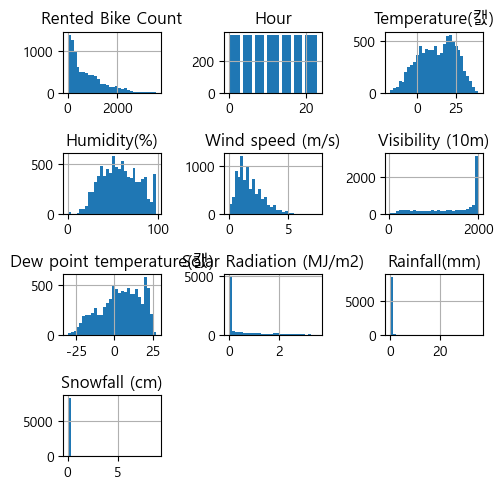

In [13]:
df.hist(bins=30, figsize=(5,5))
plt.tight_layout()
plt.show()

In [14]:
df.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [21]:
cate_features = df.select_dtypes('object').columns
for col in cate_features:
    print(f'### {col} / {len(df[col].unique())}개 ###')
    print(df[col].unique())

### Date / 365개 ###
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13

In [38]:
# Date + Hour 컬럼 생성
df['datetime'] = df['Date'] + ' ' + df['Hour'].astype('str')
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H')
df['datetime'].head(4)

0   2017-12-01 00:00:00
1   2017-12-01 01:00:00
2   2017-12-01 02:00:00
3   2017-12-01 03:00:00
Name: datetime, dtype: datetime64[ns]

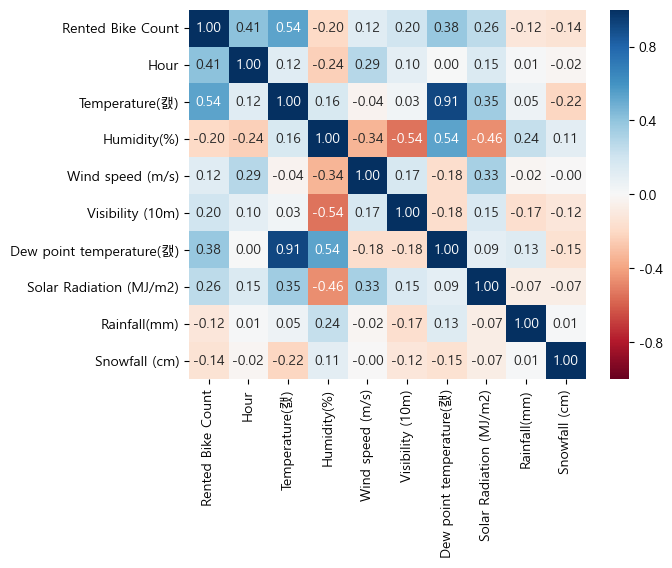

In [39]:
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

### 2. 통계분석
#### 1. 독립표본 t-test
- 귀무가설: 평일과 휴일에 따라 평균 자전거 수요량에 차이가 없다.
- 대립가설: 평일과 휴일에 따라 평균 자전거 수요량에 차이가 있다.

In [49]:
import scipy.stats as stats
no_hoil = df[df['Holiday']=='No Holiday']['Rented Bike Count']
yes_hoil = df[df['Holiday']=='Holiday']['Rented Bike Count']

stats.shapiro(no_hoil) # 등분산 만족 못함
stats.shapiro(yes_hoil) # 등분산 만족 못함
stats.mannwhitneyu(no_hoil, yes_hoil) # 귀무가설 기각

MannwhitneyuResult(statistic=2233371.0, pvalue=2.279911048361832e-17)

#### 2. 일원배치 분산분석
- 귀무가설: 계절에 따라 평균 자전거 수요량에 차이가 없다.
- 대립가설: 적어도 하나의 계절에 대해 평균 자전거 수요량에 차이가 있다.

KruskalResult(statistic=2095.900788061788, pvalue=0.0)


group1,group2,meandiff,p-adj,lower,upper,reject
Autumn,Spring,-89.5667,0.0,-113.7722,-65.3613,True
Autumn,Summer,214.4754,0.0,190.2699,238.6809,True
Autumn,Winter,-594.0568,0.0,-618.3956,-569.7179,True
Spring,Summer,304.0421,0.0,279.9029,328.1814,True
Spring,Winter,-504.49,0.0,-528.763,-480.2171,True
Summer,Winter,-808.5322,0.0,-832.8052,-784.2592,True


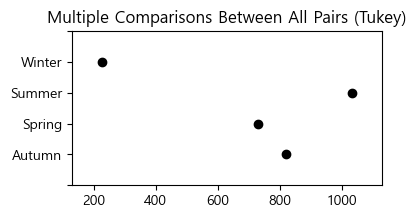

In [66]:
# 계절별 자전거 수요량 변수 만들기
seasons = df['Seasons'].unique()
for i in seasons:
    globals()['{}_value'.format(i)] = df[df['Seasons']==i]['Rented Bike Count']

# 정규성 검정
# for i in seasons:
#     val = globals()['{}_value'.format(i)]
#     print(f'## {i} ##')
#     print(stats.shapiro(val)) # 정규성 모두 만족 못함

# 등분산성 검정
stats.levene(Winter_value, Spring_value, Summer_value, Autumn_value) # 등분산성 만족 못함

# 크루스칼 왈리스 검정
print(stats.kruskal(Winter_value, Spring_value, Summer_value, Autumn_value)) # 귀무가설 기각

# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data=df['Rented Bike Count'], groups=df['Seasons'])
a = mc.tukeyhsd(alpha=0.5)
fig = a.plot_simultaneous(figsize=(4,2))
a.summary()

#### 2. 이원배치 분산분석
- 주효과 검정1
    - 귀무가설: 계절에 따라 평균 자전거 수요량에 차이가 없다.
    - 대립가설: 계절에 따라 평균 자전거 수요량에 차이가 있다.
- 주효과 검정1
    - 귀무가설: 근무시간 여부에 따라 평균 자전거 수요량에 차이가 없다.
    - 대립가설: 근무시간 여부에 따라 평균 자전거 수요량에 차이가 있다.
- 교호작용 검정
    - 귀무가설: 계절과 근무시간 여부 간에 상호작용 효과가 없다.
    - 대립가설: 계절과 근무시간 여부 간에 상호작용 효과가 있다.

In [82]:
# 데이터 설정
anova_df = df[['Functioning Day', 'Seasons', 'Rented Bike Count']]
anova_df.rename(columns = {'Functioning Day':'Functioning_Day', 
                           'Rented Bike Count':'Rented_Bike_Count'}, inplace=True)

# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'Rented_Bike_Count ~ C(Seasons) + C(Functioning_Day) + C(Seasons):C(Functioning_Day)'
model = ols(formula, anova_df).fit()
aov_table=anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Seasons),1.238507e+06,3.0,1.356084,2.577219e-01
C(Functioning_Day),1.504789e+08,1.0,494.294001,1.419976e-106
C(Seasons):C(Functioning_Day),8.265486e+08,3.0,905.017121,0.000000e+00
Residual,2.664998e+09,8754.0,NaN,NaN


- Seasons에 대한 결과, 주효과 검정에서 귀무가설을 기각할 수 없다.
- Functioning Day에 대한 결과 주효과 검정에서 귀무가설을 기각할 수 있다.
- 상호작용 효과 검정 결과, 두 변수 간에는 교호작용이 존재하는 것을 알 수 있다.

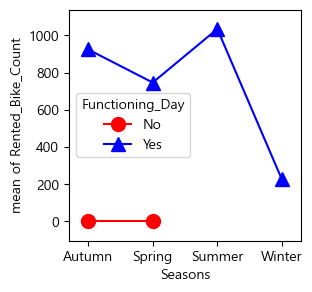

In [89]:
from statsmodels.graphics.factorplots import interaction_plot
seasons = anova_df['Seasons']
bike = anova_df['Rented_Bike_Count']
day = anova_df['Functioning_Day']
fig, ax = plt.subplots(figsize=(3,3))
fig= interaction_plot(seasons, day, bike, colors=['red', 'blue'], markers=['o', '^'], ms=10, ax=ax)